In [47]:
# utilities
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
#twitter scraping
import snscrape.modules.twitter as snstwitter
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.subplots as sp
from plotly.subplots import make_subplots

# nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from nltk.stem import PorterStemmer
import contractions


# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

from textblob import TextBlob
import re
import emoji

In [2]:
query="#RingsofPower lang:en since:2022-07-30 until:2022-08-31"

tweets_before=[]
limit=5000

for i,tweet in enumerate(snstwitter.TwitterSearchScraper(query).get_items()):
    if len(tweets_before) == limit:
        break
    else:
        tweets_before.append([tweet.content,tweet.likeCount])

In [3]:
tweets_before = pd.DataFrame(tweets_before, columns=['tweets', 'like'])
tweets_before =tweets_before.drop_duplicates("tweets")
print(tweets_before.head())
print(tweets_before.shape)

                                              tweets  like
0  The leading men of #LordOfTheRings #RingsOfPow...    16
1  Retweeting this to give photo-sensitive/epilep...     4
2  @DailyRoP Reading and hearing all these review...    15
3  Good way to get into press shots -  stand behi...    12
4  Because of course he'd say that 🙄 These actors...     6
(4924, 2)


In [4]:
query="#RingsofPower lang:en since:2022-09-01 until:2022-10-01"

tweets_after=[]
limit=5000

for i,tweet in enumerate(snstwitter.TwitterSearchScraper(query).get_items()):
    if len(tweets_after) == limit:
        break
    else:
        tweets_after.append([tweet.content,tweet.likeCount])

In [5]:
tweets_after=pd.DataFrame(tweets_after,columns=['tweets', 'like'])
tweets_after =tweets_after.drop_duplicates("tweets")
print(tweets_after.head())
print(tweets_after.shape)

                                              tweets  like
0  Wow, this episode 6 was awesome! And look, you...     1
1  Okay Twitter, I need to know whether or not co...     0
2  like seriously how to people not enjoy Rings o...     2
3  #RingsofPower episode 6… IT’S FINALLY TAKEN OF...     1
4  Another sandwich this time for dinner! Peppero...    47
(4994, 2)


In [96]:
def data_processing(text):
    text=text.lower()
    text=re.sub(r'@[A-Za-z0-9]+', '',text)
    text=re.sub(r'#','',text)
    text=re.sub(r'RT[\s]+','',text)
    text = re.sub(r"https?\S+|www\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'[^\w\s\?]+', '', text)
    text= re.sub(r"lordoftherings|ringsofpower|lord|power|rings|amazon|episode","",text)
    text = contractions.fix(text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [97]:
tweets_before["tweets"]=tweets_before["tweets"].apply(data_processing)
tweets_after["tweets"]=tweets_after["tweets"].apply(data_processing)

In [98]:
print(tweets_before.head())
print(tweets_after.head())


                                              tweets  like  Subjectivity  \
0  leading men made major fashion moves premiere ...    16      0.500000   
1  retweeting give photosensitiveepileptic people...     4      0.000000   
2  reading hearing reviews making even excited prime    15      0.750000   
3  good way get press shots stand behind orc glob...    12      0.433333   
4            course would say actors incredibly full     6      0.550000   

   polarity  Analysis  
0    0.0625  positive  
1    0.0000   neutral  
2    0.3750  positive  
3    0.1000  positive  
4    0.3500  positive  
                                              tweets  like  Subjectivity  \
0  wow 6 awesome look already know udun look futu...     1      0.708333   
1  okay twitter need know whether copious amounts...     0      0.266667   
2                      like seriously people enjoy ?     2      0.583333   
3                                    6 finally taken     1      1.000000   
4  another sandwich

In [99]:
stemmer = PorterStemmer()

def stemming(data):
    text= [stemmer.stem(word) for word in data]
    return data


In [100]:
tweets_before["tweets"] = tweets_before["tweets"].apply(lambda x :stemming(x))
tweets_after["tweets"] = tweets_after["tweets"].apply(lambda x :stemming(x))
print(tweets_before.head())
print(tweets_after.head())


                                              tweets  like  Subjectivity  \
0  leading men made major fashion moves premiere ...    16      0.500000   
1  retweeting give photosensitiveepileptic people...     4      0.000000   
2  reading hearing reviews making even excited prime    15      0.750000   
3  good way get press shots stand behind orc glob...    12      0.433333   
4            course would say actors incredibly full     6      0.550000   

   polarity  Analysis  
0    0.0625  positive  
1    0.0000   neutral  
2    0.3750  positive  
3    0.1000  positive  
4    0.3500  positive  
                                              tweets  like  Subjectivity  \
0  wow 6 awesome look already know udun look futu...     1      0.708333   
1  okay twitter need know whether copious amounts...     0      0.266667   
2                      like seriously people enjoy ?     2      0.583333   
3                                    6 finally taken     1      1.000000   
4  another sandwich

In [101]:
def getsubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getpolarity(text):
    return TextBlob(text).sentiment.polarity

In [102]:
tweets_before["Subjectivity"] = tweets_before["tweets"].apply(getsubjectivity)
tweets_after["Subjectivity"] = tweets_after["tweets"].apply(getsubjectivity)

tweets_before["polarity"] = tweets_before["tweets"].apply(getpolarity)
tweets_after["polarity"] = tweets_after["tweets"].apply(getpolarity)

print(tweets_before.head(3))
print(tweets_after.head(3))

                                              tweets  like  Subjectivity  \
0  leading men made major fashion moves premiere ...    16          0.50   
1  retweeting give photosensitiveepileptic people...     4          0.00   
2  reading hearing reviews making even excited prime    15          0.75   

   polarity  Analysis  
0    0.0625  positive  
1    0.0000   neutral  
2    0.3750  positive  
                                              tweets  like  Subjectivity  \
0  wow 6 awesome look already know udun look futu...     1      0.708333   
1  okay twitter need know whether copious amounts...     0      0.266667   
2                      like seriously people enjoy ?     2      0.583333   

   polarity  Analysis  
0  0.366667  positive  
1  0.233333  positive  
2  0.033333  positive  


In [103]:
def getAnalysis(score):
    if score < 0:
        return "negative"
    elif score == 0:
        return "neutral"
    else:
        return "positive"

In [104]:
tweets_before["Analysis"] = tweets_before["polarity"].apply(getAnalysis)
tweets_after["Analysis"] = tweets_after["polarity"].apply(getAnalysis)

In [105]:
# Create the first countplot
trace1 = go.Bar(x=tweets_before['Analysis'].value_counts().index,
                y=tweets_before['Analysis'].value_counts().values,
                name='Before')

# Create the second countplot
trace2 = go.Bar(x=tweets_after['Analysis'].value_counts().index,
                y=tweets_after['Analysis'].value_counts().values,
                name='After')

# Create a subplot with two columns
fig = sp.make_subplots(rows=1, cols=2)

# Add the first countplot to the first column
fig.add_trace(trace1, row=1, col=1)

# Add the second countplot to the second column
fig.add_trace(trace2, row=1, col=2)

# Update the layout of the figure
fig.update_layout(title='Sentiment Analysis Before and After Preprocessing',
                  xaxis=dict(title='Sentiment'),
                  yaxis=dict(title='Count'))

# Show the plot
fig.show()

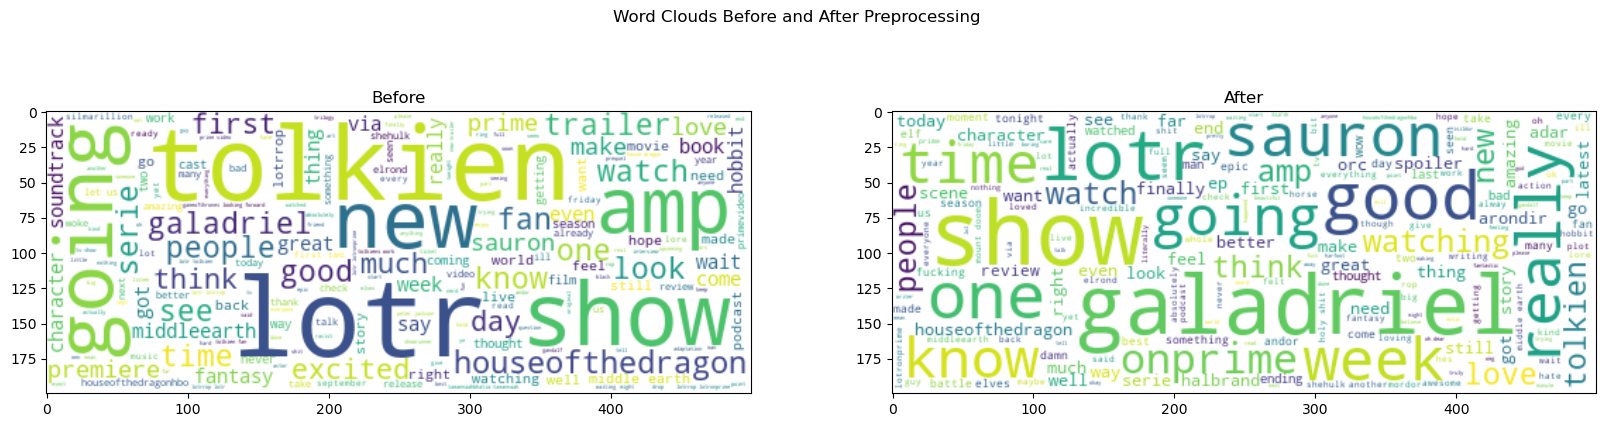

In [106]:
# Combine all the words in the tweets before preprocessing into a single string
allwords_before = ' '.join([' '.join(word_tokenize(tweet)) for tweet in tweets_before["tweets"]])

# Create the word cloud for the tweets before preprocessing
wordcloud_before = WordCloud(width=500, background_color='white').generate(allwords_before)

# Combine all the words in the tweets after preprocessing into a single string
allwords_after = ' '.join([' '.join(word_tokenize(tweet)) for tweet in tweets_after["tweets"]])

# Create the word cloud for the tweets after preprocessing
wordcloud_after = WordCloud(width=500, background_color='white').generate(allwords_after)

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(20,5))

# Add the first word cloud to the first subplot
axs[0].imshow(wordcloud_before, interpolation='bilinear')
axs[0].set_title('Before')

# Add the second word cloud to the second subplot
axs[1].imshow(wordcloud_after, interpolation='bilinear')
axs[1].set_title('After')

# Set the title for the whole figure
fig.suptitle('Word Clouds Before and After Preprocessing')

# Show the plot
plt.show()

In [107]:
all_tweets =pd.concat([tweets_before,tweets_after])
all_tweets.shape

(9918, 5)

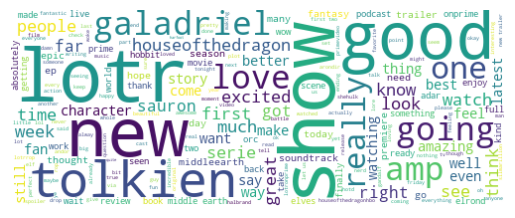

In [108]:
pos_tweets = all_tweets[all_tweets["Analysis"]=="positive"]
allwords_pos = ' '.join([' '.join(word_tokenize(tweet)) for tweet in pos_tweets["tweets"]])
wordcloud_pos = WordCloud(width=500, background_color='white').generate(allwords_pos)

plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis("off")
plt.show()

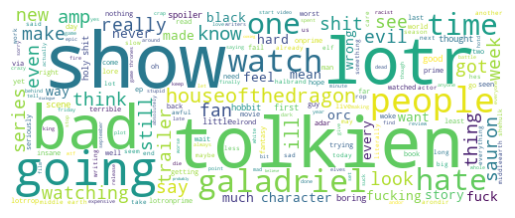

In [109]:
neg_tweets = all_tweets[all_tweets["Analysis"]=="negative"]
allwords_neg = ' '.join([' '.join(word_tokenize(tweet)) for tweet in neg_tweets["tweets"]])
wordcloud_neg = WordCloud(width=500, background_color='white').generate(allwords_neg)

plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis("off")
plt.show()

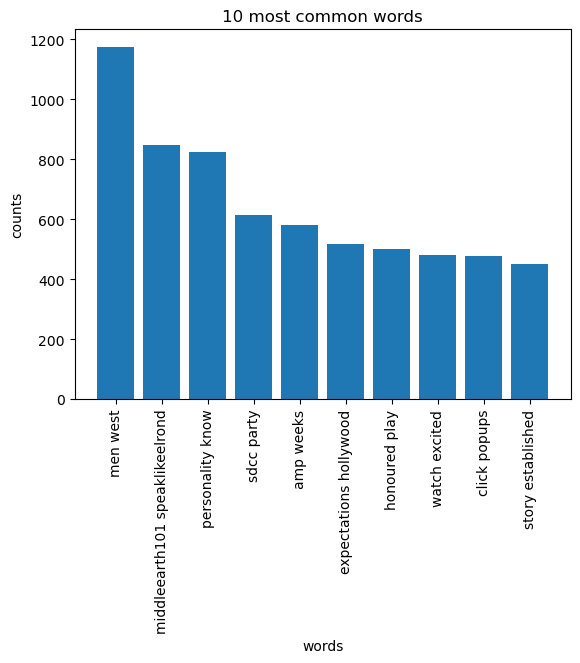

In [110]:
def plot_10_most_common_words(count_data, count_vectorizer):
    words = count_vectorizer.vocabulary_.keys()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 

    plt.bar(x_pos, counts,align='center')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.title('10 most common words')
    plt.show()

# Initialise the count vectorizer with the English stopwords
count_vectorizer = CountVectorizer(stop_words='english',ngram_range=(1,2))

# Fit the count vectorizer on the pre-processed tweets
count_vectorizer.fit(all_tweets["tweets"])

# Transform the pre-processed tweets to a matrix of token counts
count_data = count_vectorizer.transform(all_tweets["tweets"])

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)


In [111]:
X=all_tweets["tweets"]
y=all_tweets["Analysis"]
X=CountVectorizer(ngram_range=(1,2)).fit_transform(all_tweets["tweets"])

In [112]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=123)

In [113]:
log_reg = LogisticRegression().fit(X_train, y_train)
y_predicted = log_reg.predict(X_test)

print('Accuracy score on test data: ', accuracy_score(y_test, y_predicted))

Accuracy score on test data:  0.8402217741935484


In [114]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

    negative       0.86      0.55      0.67       348
     neutral       0.75      0.96      0.84       629
    positive       0.91      0.86      0.89      1007

    accuracy                           0.84      1984
   macro avg       0.84      0.79      0.80      1984
weighted avg       0.85      0.84      0.84      1984



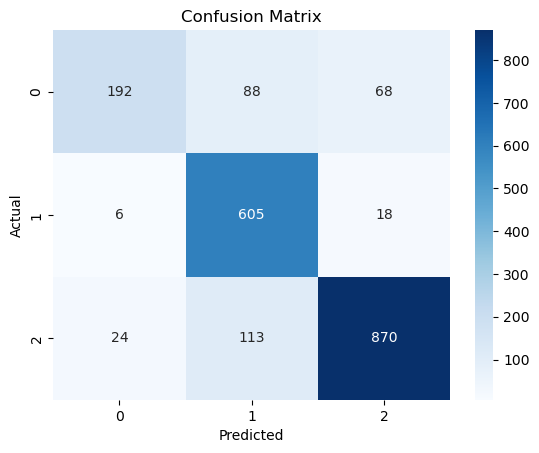

In [115]:
cm = confusion_matrix(y_test, y_predicted)

# Plot confusion matrix as heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [116]:
param_grid = {'C' : [0.001,0.01,0.1,1,10]}
grid=GridSearchCV(LogisticRegression(),param_grid)
grid.fit(X_train,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [117]:
print("Best Parameters:",grid.best_params_)

Best Parameters: {'C': 10}


In [118]:
y_pred=grid.predict(X_test)

In [119]:
logreg_acc=accuracy_score(y_pred,y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 85.43%


In [120]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    negative       0.88      0.60      0.71       348
     neutral       0.77      0.97      0.86       629
    positive       0.92      0.87      0.90      1007

    accuracy                           0.85      1984
   macro avg       0.85      0.81      0.82      1984
weighted avg       0.86      0.85      0.85      1984



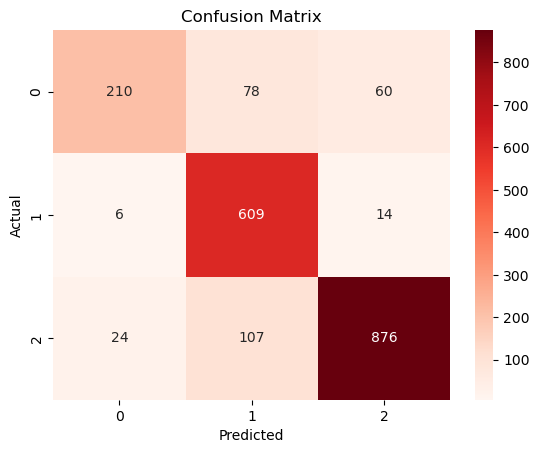

In [121]:
cm_grid = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
sns.heatmap(cm_grid, annot=True, cmap='Reds', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [122]:
SVCmodel=LinearSVC()

SVCmodel.fit(X_train,y_train)

LinearSVC()

In [123]:
svc_pred=SVCmodel.predict(X_test)

svc_acc=accuracy_score(svc_pred,y_test)
print("Test accuracy: {:.2f}%".format(svc_acc*100))

Test accuracy: 85.53%


In [124]:
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

    negative       0.87      0.61      0.72       348
     neutral       0.76      0.97      0.85       629
    positive       0.93      0.87      0.90      1007

    accuracy                           0.86      1984
   macro avg       0.85      0.82      0.82      1984
weighted avg       0.87      0.86      0.85      1984



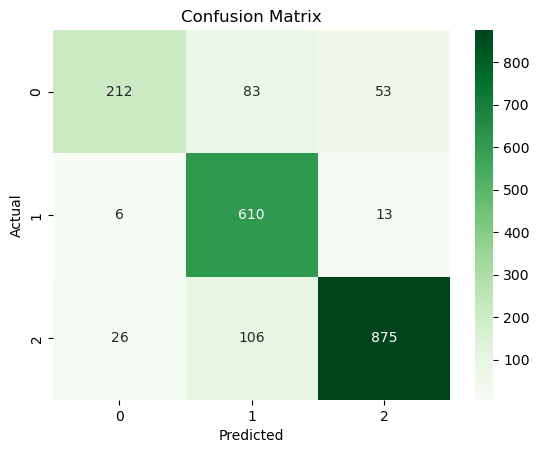

In [125]:
cm_svc = confusion_matrix(y_test, svc_pred)

# Plot confusion matrix as heatmap
sns.heatmap(cm_svc, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()